In [3]:
pCaraEm10Lancamentos = (1/2)**10
print(str(1/pCaraEm10Lancamentos))
print(str(pCaraEm10Lancamentos))
#H0: Os lançamentos e a moeda são honestos (p=.5)
#H1: Tem coisa estranha (p!=.5)

1024.0
0.0009765625


In [4]:
#Testes de aderência
#https://docs.scipy.org/doc/scipy-0.16.1/reference/stats.html
#https://matplotlib.org/3.5.1/api/_as_gen/matplotlib.pyplot.plot.html
import numpy as np
import matplotlib.pyplot as plt

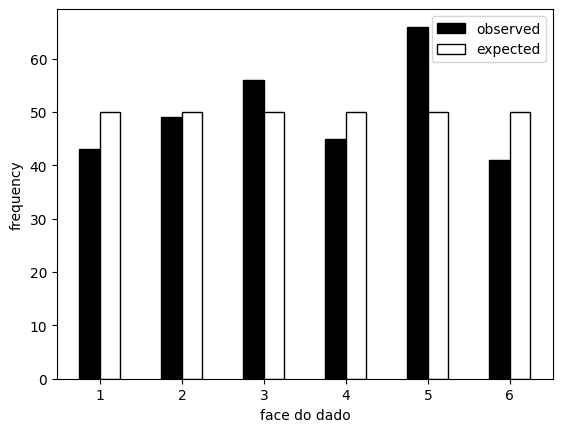

e=[50.0, 50.0, 50.0, 50.0, 50.0, 50.0]


In [5]:
#0. Exemplo do lançamento de dado por 300 vezes
x = list(range(1,7))
# print(x)
o = [43, 49, 56, 45, 66, 41]#observado
n = np.sum(o)#tamanho da amostra
# print(n)
p0 = [1/6]*6#distribuição pretendida (Uniforme)
# print(p0)
#p: a distribuição de probabilidades subjacente a 'o'
e = [n * p0i for p0i in p0]#n*p0#frequências esperadas (sob H0: p = p0)
# print(e)
def plotFrequencies(o, e, x, xlab):
        width = 0.25
        r = np.arange(len(x))
        plt.Figure(figsize = (.5,2))
        plt.bar(r, o, color = 'black',
                width = width, edgecolor = 'black',
                label='observed')
        plt.bar(r+width, e, color = 'white',
                width = width, edgecolor = 'black',
                label='expected')
        plt.xlabel(xlab)
        plt.ylabel("frequency")
        # plt.title("Number of people voted in each year")
        # plt.grid(linestyle='--')
        plt.xticks(r + width/2,x)
        plt.legend()
        plt.show()
plotFrequencies(o, e, x, "face do dado")
print('e='+str(e))

In [6]:
from scipy import stats
ct = stats.chisquare(f_obs = o, f_exp = e)#Teste de homogeneidade Qui-Quadrado de Pearson
ct2 = stats.chisquare(f_obs = o)#Teste de homogeneidade Qui-Quadrado de Pearson
# print(type(ct))
def printTestResults(testResults):
    print("statistic = ", testResults.statistic) #a estatística de teste
    print("p-value = ", testResults.pvalue)#o p-valor do teste (a probabilidade das difereças
                                            # observadas, ou maiores, terem se dado ao acaso,
                                            # supondo H0 verdadeira)
printTestResults(ct)
printTestResults(ct2)

statistic =  8.96
p-value =  0.11067029926954655
statistic =  8.96
p-value =  0.11067029926954655


In [4]:
#Our Pearson's chi-square test
import pandas as pd
def ourChisqTest (observed, expected):
  o = np.array(observed)
  e = np.array(expected)
  residuals = (o - e)/np.sqrt(e)#the Pearson residuals, (observed - expected) / sqrt(expected).
  statistic = sum(residuals**2)#Estatística Qui-Quadrado
  df = len(observed)-1#nº de graus de liberdade
  pValue = stats.chi2.sf(x = statistic, df=df)
  ret = {'statistic' : statistic, 'df' : df
             , 'pvalue' : pValue}
  print('statistic = ', statistic)
  print('pvalue = ', pValue)
  # ret = pd.DataFrame({'statistic' : statistic, 'df' : df
  #            , 'pvalue' : pValue, 'observed' : observed
  #            , 'expected' : expected, 'residuals' : residuals})
  return(ret)

cat3 = ourChisqTest(o, e)#Teste de aderência Qui-Quadrado de Pearson
# printTestResults(cat3)

statistic =  8.959999999999999
pvalue =  0.11067029926954661


In [5]:
#1. (Bussab & Morettin) Um estudo sobre 150 acidentes de trabalho numa
# indústria revelou a distribuição de frequências ao lado. Verifique se os
# acidentes se dão de maneira homogênea ao longo da semana
nAcidentes = [32, 40, 20, 25, 33]#[32, 50, 10, 25, 33]#
ct = stats.chisquare(f_obs = nAcidentes)#Teste de homogeneidade Qui-Quadrado de Pearson
printTestResults(ct)
#com alpha=10%, rejeito H0 (decido que o nº de acidentes varia
# ao longo dos dias da semana)

statistic =  7.933333333333334
p-value =  0.09405103275477587


np.min(e)= 17.0748889257311


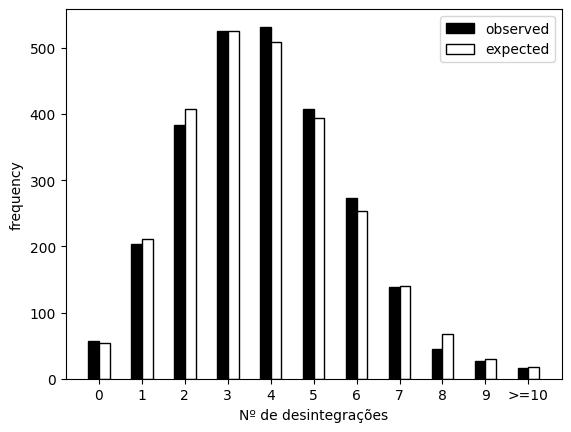

statistic =  12.88493810339548
p-value =  0.2301764141414341


In [6]:
#2. (Bussab & Morettin) Estuda-se se a distribuição de Poisson (λ=3.87)
# adere ao conjunto de dados sintetizados na tabela
# abaixo, sobre o nº de substâncias radioativas desintegradas em uma
# amostra de 2608 unidades de tempo de 7.5 segundos.
#H0: A Poisson(mu=3.87) adere aos dados
#H1: A Poisson(mu=3.87) não adere aos dados
#Nº de desintegrações 0 1 2 3 4 5 6 7 8 9 ≥10
# Frequência observada 57 203 383 525 532 408 273 139 45 27 16
from os import stat
# from numpy import append
from scipy.stats import poisson
o = [57, 203, 383, 525, 532, 408, 273, 139, 45, 27, 16]
dist = poisson(mu = 3.87)#Omega_X = {0, 1, ...}
#P(x) = mu*exp(-mu)/x!
x = list(range(0, 10))
p0 = list(dist.pmf(x))
p0.append (1-sum(p0))
x.append('>=10')
# print(p0)
n = sum(o)#tamanho da amostra
# print(n)
e = [n*p0i for p0i in p0]#frequencias esperadas
# print(e)
print('np.min(e)=', np.min(e))#There is no e<=5
plotFrequencies(o, e, x, "Nº de desintegrações")
ct = stats.chisquare(f_obs = o, f_exp = e)
printTestResults(ct)

n =  10


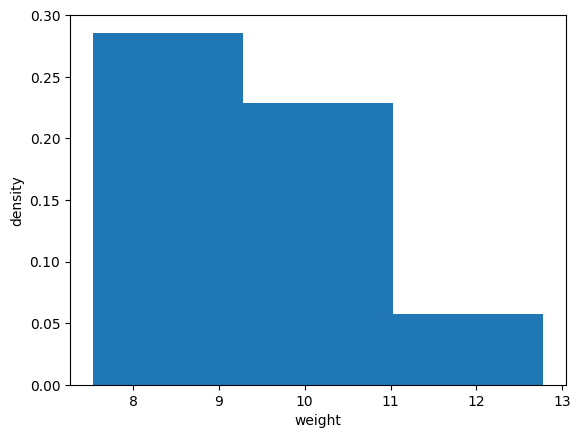

In [8]:
#3. Questiona-se se os dados a seguir são normalmente distribuídos
# Tratam-se de pesos de animais, em kg
amostra=[7.53, 7.67, 12.78, 10.82, 10.74, 10.64, 7.75, 7.61, 10.83, 8.49]
def sampleFirstGlance(x, varName):
    n = len(x)
    print('n = ', n)
    plt.hist(x, density = True, bins=round(np.sqrt(n)))
    plt.xlabel(varName)
    plt.ylabel("density")
    plt.show()

sampleFirstGlance(x = amostra, varName = 'weight')
#o histograma parece ser normal?

x_bar=9.485999999999999, s=1.7885591966720025


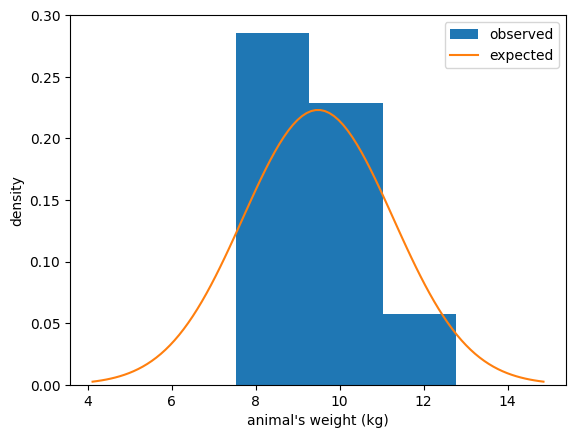

In [10]:
x_bar = np.mean(amostra)
s = np.std(amostra)
print('x_bar='+str(x_bar)+', s='+str(s))
#amostra=np.random.exponential(scale=x_bar, size=10)#normal(loc = x_bar, scale = s, size=10)
def normDensity (x):
  dist = stats.norm(loc = x_bar, scale = s)#Omega_X = {x\in R}
  ret = dist.pdf(x)
  return(ret)
x = np.linspace(x_bar - 3*s, x_bar + 3*s, 100)#take 100 evenly spaced points between (m - 3*s) and (m + 3*s)
e = normDensity(x)
def plotDensities(o, e, x, xlab):
  n = len(o)
  plt.hist(o, density = True, label='observed', bins=round(np.sqrt(n)))
  plt.plot(x, e, label='expected')
  plt.xlabel(xlab)
  plt.ylabel("density")
  plt.legend()
  plt.show()
plotDensities(amostra, e, x, "animal's weight (kg)")

In [17]:
from scipy.stats import norm
#pMenor7_53 = stats.norm.cdf(7.53, 9.485, 1.788)
pMenor7_53 = stats.norm(loc = 9.485, scale = 1.788).cdf(7.53)
print('pMenor7_53='+str(pMenor7_53))

pMenor7_53=0.13710900859430863


In [9]:
#H0: A amostra segue uma distribuição normal com média x_bar e desvio-padrão s 
#H1: A amostra não segue uma distribuição normal com média x_bar e desvio-padrão s 
ksTest = stats.kstest(amostra, stats.norm.cdf, args = (x_bar, s))
shTest = stats.shapiro(x = amostra)#Teste de normalidade (adequado para pequenas amostras)
printTestResults(ksTest)#para alpha = 6%, não rejeita-se H0
printTestResults(shTest)#para alpha = 6%, rejeita-se H0

statistic =  0.24060512063077866
p-value =  0.532331530040741
statistic =  0.8452205657958984
p-value =  0.05094755068421364


$p-value = P(D_n\geq0.2406...) = 0.5323...$

n =  10


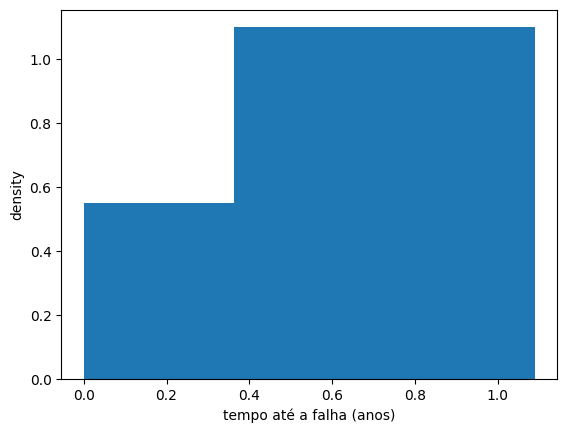

In [10]:
#4. Questiona-se se os dados a seguir são exponencialmente distribuídos.
#Tratam-se de tempos até a falha de impressoras (em anos)
amostra=[0.93, 0, 1.09, 0.62, 0.37, 0.54, 0.74, 0.06, 0.46, 0.75]
sampleFirstGlance(x = amostra, varName = 'tempo até a falha (anos)')

x_bar =  0.5559999999999999  ano(s) entre falhas, em média
myLambda =  1.7985611510791368  falha(s) por ano, em média


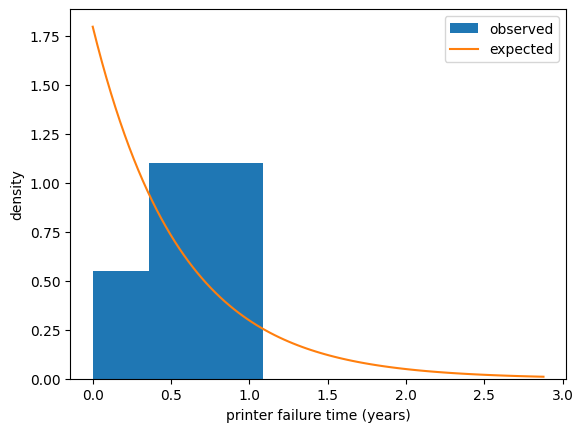

In [11]:
x_bar = np.mean(amostra)
myLambda = 1/x_bar
print('x_bar = ', x_bar, ' ano(s) entre falhas, em média')
print('myLambda = ', myLambda, ' falha(s) por ano, em média')
def expDensity (x):
  dist = stats.expon(scale = 1/myLambda, loc = 0)#Omega_X = {x\in R| x > 0}
  ret = dist.pdf(x)
  return(ret)
x = np.linspace(1e-3, np.max(amostra) + s, 100)#take 100 evenly spaced points between 1e-3 and (max + s)
e = expDensity(x)
plotDensities(amostra, e, x, "printer failure time (years)")

In [12]:
#H0: A amostra segue uma distribuiçção exponencial com  média x_bar
#H1: A amostra não segue uma distribuiçção exponencial com  média x_bar
ksTest = stats.kstest(amostra, stats.expon.cdf, args = (0, x_bar))
printTestResults(ksTest)#para alpha = 5%, não rejeita-se H0

statistic =  0.2859669036938817
p-value =  0.32225401745063964


In [13]:
#Studying a Titanic data variable
import pandas as pd
data = pd.read_csv('C:/Users/praf6/OneDrive - Universidade Federal do Cariri - UFCA/Drive/UFCA/Ensino/CRAN R_aulas/kaggleFiles/data/titanic/train.csv')
data.head(-3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
883,884,0,2,"Banfield, Mr. Frederick James",male,28.0,0,0,C.A./SOTON 34068,10.5000,NaN,S
884,885,0,3,"Sutehall, Mr. Henry Jr",male,25.0,0,0,SOTON/OQ 392076,7.0500,NaN,S
885,886,0,3,"Rice, Mrs. William (Margaret Norton)",female,39.0,0,5,382652,29.1250,NaN,Q
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S


n =  891


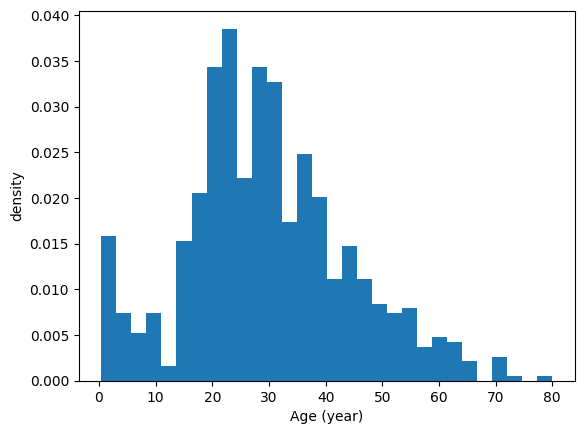

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64


In [14]:
amostra=data['Age']
sampleFirstGlance(x = amostra, varName = 'Age (year)')
print(amostra.describe())
#removing missing values
#With missing values, the hypothesis tests do not work...
amostra = amostra[amostra.isna()==False]

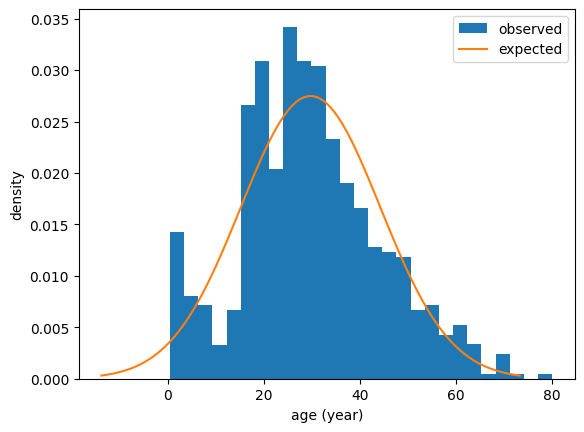

statistic =  0.06456077657008552
p-value =  0.004963471924879692
statistic =  0.981458306312561
p-value =  7.340329943872348e-08


In [15]:
x_bar = np.mean(amostra)
s = np.std(amostra)
x = np.linspace(x_bar - 3*s, x_bar + 3*s, 100)#take 100 evenly spaced points between (m - 3*s) and (m + 3*s)
e = normDensity(x)
plotDensities(amostra, e, x, "age (year)")
ksTest = stats.kstest(amostra, stats.norm.cdf, args = (x_bar, s))
shTest = stats.shapiro(x = amostra)#Teste de normalidade (adequado para pequenas amostras)
printTestResults(ksTest)#para alpha = 1%, rejeita-se H0
printTestResults(shTest)#para alpha = 1%, rejeita-se H0

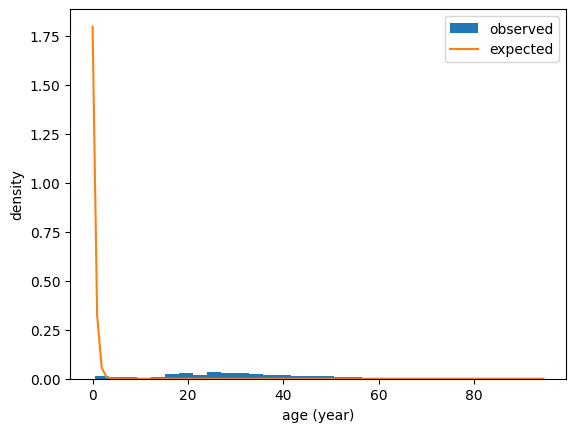

KstestResult(statistic=0.19017367360329562, pvalue=4.3598756240065177e-23, statistic_location=18.0, statistic_sign=-1)

In [82]:
# lamostra = np.log(amostra)
# def expLognormal (x):
#   dist = stats.lognorm(s = np.std(lamostra), loc = 0, scale = np.exp(np.mean(lamostra)))#Omega_X = {x\in R| x > 0}
#   ret = dist.pdf(x)
#   return(ret)
# x = np.linspace(1e-3, np.max(amostra) + np.std(amostra), 100)#take 100 evenly spaced points between 1e-3 and (max + s)
# e = expDensity(x)
# plotDensities(amostra, e, x, "age (year)")


# stats.kstest(amostra, stats.lognorm.cdf, args = (np.std(lamostra), 0, np.exp(np.mean(lamostra))))